In [2]:
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sn

In [31]:
runstats_df = pd.read_csv("logs/log12.csv")

In [32]:
runstats_df = runstats_df.loc[:, (runstats_df != 0).any(axis=0)]

In [33]:
runstats_df

,Instructions,FullBranches,PartialBranches,NumBranches,UserTime,MallocUsage,NumQueries,NumQueryConstructs,WallTime,CoveredInstructions,...,SExts,IntToPtrs,PtrToInts,BitCasts,ICmps,PHIs,Selects,Calls,Shls,AShrs
0,180252,63,189,1406,676380.0,45927200,30,384,566388.0,4104,...,2392,9,157,202,13385,1156,1,6409,25,6
1,163806,57,190,1406,723506.0,45915112,9,83,400107.0,4044,...,2327,3,109,142,12022,1122,1,5384,25,6
2,163810,58,189,1406,728372.0,45916336,9,83,377507.0,4048,...,2328,3,109,142,12023,1122,1,5384,25,6
3,163788,57,190,1406,647914.0,45915928,8,72,349533.0,4044,...,2327,3,109,142,12020,1122,1,5384,25,6
4,163801,58,189,1406,669298.0,45914800,9,83,369420.0,4048,...,2328,3,109,142,12022,1122,1,5384,25,6
5,163818,57,190,1406,733598.0,45916080,9,87,340190.0,4048,...,2330,3,109,142,12025,1122,1,5384,25,6
6,163530,57,187,1406,667959.0,45901560,7,61,359257.0,3993,...,2323,2,108,142,11999,1121,1,5346,25,6
7,163864,58,190,1406,625518.0,45918976,14,162,380670.0,4067,...,2331,3,109,142,12027,1124,1,5384,25,6
8,180252,63,189,1406,678003.0,45928736,30,384,549109.0,4104,...,2392,9,157,202,13385,1156,1,6409,25,6
9,163792,58,189,1406,638480.0,45915984,8,76,342142.0,4048,...,2328,3,109,142,12021,1122,1,5384,25,6


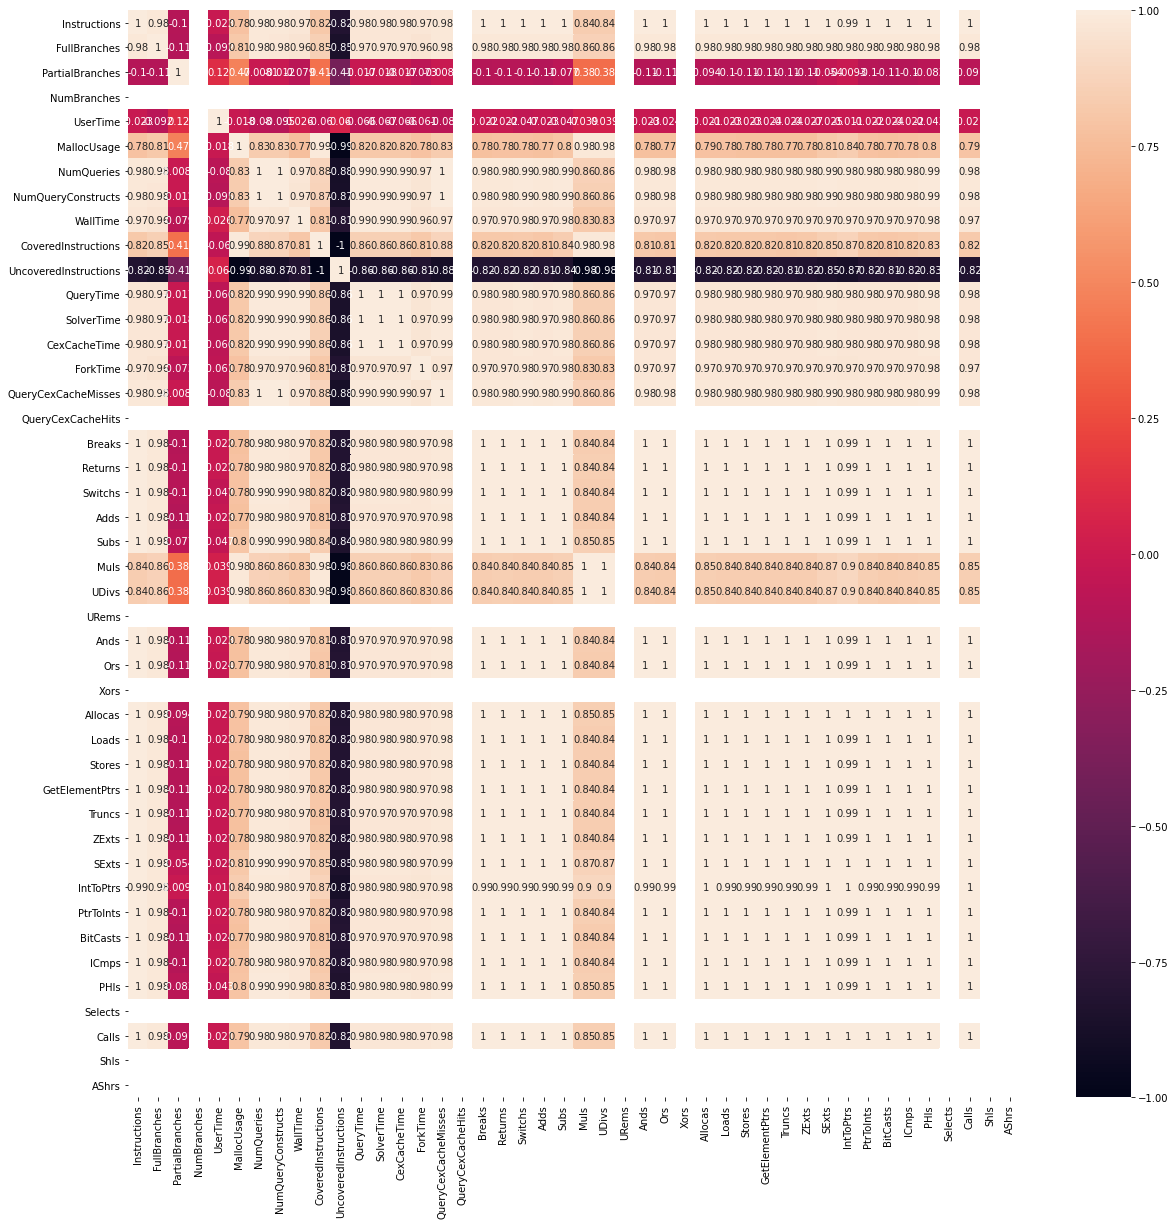

In [34]:
corrMatrix = runstats_df.corr()
plt.figure(figsize = (20,20))
sn.heatmap(corrMatrix, annot=True)